In [187]:
import pandas as pd
df = pd.read_csv('SMSSpamCollection',delimiter='\t',header=None)
df

,0,1
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [188]:
print('Number of spam messages',df[df[0]=='spam'][0].count())

Number of spam messages 747


In [189]:
print('Number of spam messages',df[df[0]=='ham'][0].count())

Number of spam messages 4825


In [190]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split,cross_val_score

In [191]:
xtrain,xtest,ytrain,ytest = train_test_split(df.iloc[:,1],df.iloc[:,0],random_state = 50)

In [192]:
xtrain.shape

(4179,)

In [193]:
xtest.shape

(1393,)

In [194]:
vectorizer = TfidfVectorizer() 
xtrain = vectorizer.fit_transform(xtrain)
xtest = vectorizer.transform(xtest)
print(xtrain.shape)
print(xtest.shape)

(4179, 7380)
(1393, 7380)


In [195]:
classifier = LogisticRegression()
classifier.fit(xtrain,ytrain)

LogisticRegression()

In [196]:
prediction = classifier.predict(xtest)

In [197]:
print(prediction[:5])

['spam' 'ham' 'ham' 'ham' 'spam']


In [198]:
print(ytest[:5])

3409    spam
2103     ham
2665     ham
3239     ham
1205    spam
Name: 0, dtype: object


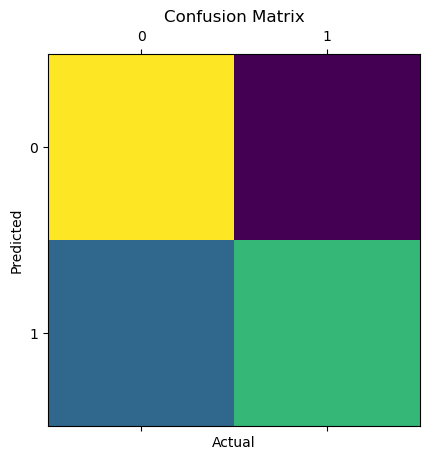

In [199]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
y_test = [0,0,0,0,0,1,1,1,1,1]
y_pred = [0,1,0,0,0,0,0,1,1,1]
confusion = confusion_matrix(y_test,y_pred)
# print(confusion) # Matrix
plt.matshow(confusion)
plt.title("Confusion Matrix")
plt.xlabel('Actual')
plt.ylabel("Predicted")
plt.show()

In [200]:
from sklearn.metrics import accuracy_score
ypred,ytrue = [0, 1, 1, 0], [1, 1, 1, 1]
print("Accuracy =",accuracy_score(ypred,ytrue))

Accuracy = 0.5


In [201]:
scores = cross_val_score(classifier,xtrain,ytrain,cv=5)
print("CV scores =",scores)
print("Mean =",np.mean(scores))

CV scores = [0.94856459 0.9569378  0.94736842 0.96411483 0.95568862]
Mean = 0.9545348537375011


#### Precision

In [202]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
y_train = lb.fit_transform(ytrain)
classifier.fit(xtrain,y_train)
y_train

array([[0],
       [0],
       [0],
       ...,
       [0],
       [1],
       [0]])

In [203]:
import warnings
warnings.filterwarnings('ignore')
scores = cross_val_score(classifier,xtrain,y_train,cv=5,scoring='precision')
print("Scores =",scores)
print("Mean =",np.mean(scores))

Scores = [0.98630137 1.         1.         1.         0.97530864]
Mean = 0.9923220023676645


### F1 score

In [204]:
scores = cross_val_score(classifier,xtrain,y_train,cv=5,scoring='f1')
print("CV scores =",scores)
print("Mean =",np.mean(scores))

CV scores = [0.77005348 0.8125     0.76086957 0.85       0.81025641]
Mean = 0.8007358902819262


### Recall Score

In [205]:
scores = cross_val_score(classifier,xtrain,y_train,cv=5,scoring='recall')
print("CV scores =",scores)
print("Mean =",np.mean(scores))

CV scores = [0.63157895 0.68421053 0.61403509 0.73913043 0.69298246]
Mean = 0.6723874904652938


In [206]:
y_predicted = classifier.predict(xtest)
print(y_predicted.shape)

(1393,)


In [207]:
ytest = lb.transform(ytest)
ytest.shape

(1393, 1)

In [208]:
ytest = np.reshape(ytest,(ytest.shape[0],))

In [209]:
print(ytest.shape)
print(y_predicted.shape)

(1393,)
(1393,)


In [210]:
conf_matrix = confusion_matrix(y_predicted,ytest)
print(conf_matrix)

[[1215   32]
 [   2  144]]


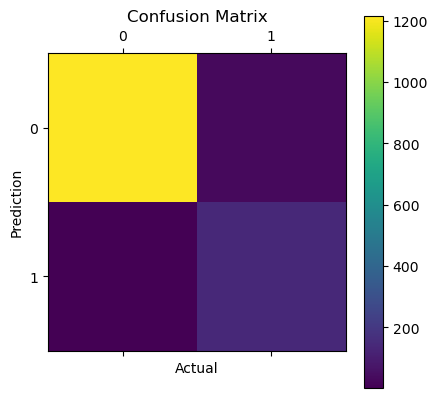

In [211]:
plt.matshow(conf_matrix)
plt.title("Confusion Matrix")
plt.ylabel('Prediction')
plt.xlabel('Actual')
plt.colorbar()
plt.show()